In [1]:
import sys
sys.path.append("/Users/shin/work/deep/keras/pix2pix")

In [2]:
import keras
import keras.backend as K
import numpy as np
from keras.utils import generic_utils
from keras.optimizers import Adam, SGD
from PIL import Image
from models import discriminator, generator, GAN,discriminator2
sys.path.append("/Users/shin/work/deep/keras/pix2pix")
from facade_dataset2 import load_dataset
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
train_img, train_label = load_dataset(dataDir = "../dataset/base", data_range=(1,300))

load dataset start
     from: ../dataset/base
load dataset done


In [4]:
train_label.shape

(299, 256, 256, 12)

In [5]:
def l1_loss(y_true,y_pred):
    return K.mean(K.abs(y_pred - y_true))

In [28]:
def entropy(y_true,y_pred):
    return K.sum(y_pred, axis = [2,3]) * y_true

In [29]:
patch_size = 64
batch_size = 50
nb_epoch = 1

In [30]:
# Create optimizers
opt_gan = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# opt_discriminator = SGD(lr=1E-3, momentum=0.9, nesterov=True)
opt_discriminator = Adam(lr=1E-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [31]:
gan_loss = [l1_loss, entropy]
gan_loss_weights = [10,1]

gen = generator()
dis = discriminator2()
dis.trainable = False

gan = GAN(gen,dis)
gan.compile(loss = gan_loss, loss_weights = gan_loss_weights,optimizer = opt_gan)

dis.trainable = True
dis.compile(loss=entropy, optimizer=opt_discriminator)            

In [32]:
dis.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_18 (InputLayer)            (None, 256, 256, 12)  0                                            
____________________________________________________________________________________________________
input_17 (InputLayer)            (None, 256, 256, 3)   0                                            
____________________________________________________________________________________________________
sequential_72 (Sequential)       (None, 128, 128, 32)  6176        input_18[0][0]                   
____________________________________________________________________________________________________
sequential_73 (Sequential)       (None, 128, 128, 32)  1568        input_17[0][0]                   
___________________________________________________________________________________________

In [33]:
img_batch = train_img[ 0:10,:,:,:]
label_batch =train_label[ 0:10,:,:,:]
generated_img = gen.predict(label_batch)

In [34]:
dis_p = dis.predict([label_batch,img_batch])
print(dis_p.shape)

(10, 16, 16, 1)


In [24]:
dis_p = dis.predict([labels,imgs])
dis_p

array([[ 0.72244537],
       [ 0.7026208 ],
       [ 0.72212666],
       [ 0.70670664],
       [ 0.73595911],
       [ 0.71626073],
       [ 0.7092734 ],
       [ 0.74123794],
       [ 0.7238369 ],
       [ 0.72382963],
       [ 0.68323517],
       [ 0.67408049],
       [ 0.66163939],
       [ 0.67315865],
       [ 0.67332935],
       [ 0.67834163],
       [ 0.66755486],
       [ 0.67768854],
       [ 0.67667717],
       [ 0.6791324 ]], dtype=float32)

In [35]:
dis_y = np.array([1] * 10 + [0] * 10)
labels = np.concatenate([label_batch,label_batch])
imgs = np.concatenate([img_batch,generated_img])
d_loss = np.array(dis.train_on_batch([labels,imgs],dis_y ))

ValueError: Cannot feed value of shape (20, 1) for Tensor 'activation_32_target:0', which has shape '(?, ?, ?, ?)'

In [58]:
nb_train = 299
for epoch in range(nb_epoch):
    print("Epoch is ", epoch)
    print("Number of batches", int(nb_train/batch_size))
    ind = np.random.permutation(nb_train)
    for index in range(int(nb_train/batch_size)):
        print(index)
        img_batch = train_img[ind[(index*batch_size) : ((index+1)*batch_size)],:,:,:]
        label_batch =train_label[ind[(index*batch_size) : ((index+1)*batch_size)],:,:,:]
        generated_img = gen.predict(label_batch)
        labels = np.concatenate([label_batch,label_batch])
        imgs = np.concatenate([img_batch,generated_img])
        dis_y = np.array([1] * batch_size + [0] * batch_size)
        d_loss = np.array(dis.train_on_batch([labels,imgs],dis_y ))
        gan_y = np.array([1] * batch_size)
        g_loss = gan.train_on_batch([label_batch, img_batch], [img_batch, gan_y])
        

Epoch is  0
Number of batches 5
0
(50, 256, 256, 3)
1
(50, 256, 256, 3)


KeyboardInterrupt: 

In [ ]:
label_batch =train_label[0: 10,:,:,:]
labels = np.concatenate([label_batch,label_batch])

## test

In [56]:
label_batch =train_label[0: 10,:,:,:]
img_batch = train_img[0:10,:,:,:]

train_y = np.array([1] * 10)
gan.train_on_batch([label_batch,img_batch],[img_batch,train_y])

[8.7451668, 0.78720349, 0.87313193]

In [36]:
w0 = np.copy(dis.layers[-1].get_weights()[0])
gan.train_on_batch([train_label,train_img], [train_img,train_y])
w1 = np.copy(dis.layers[-1].get_weights()[0])
dis.train_on_batch([train_label,train_img],train_y)
w2 = np.copy(dis.layers[-1].get_weights()[0])

In [37]:
print(np.array_equal(w0,w1))
print(np.array_equal(w1,w2))

True
False


In [55]:
label_batch = train_label[0:9,:,:]

In [59]:
label_batch.shape

(9, 256, 256, 1)

In [122]:
image = combine_images(label_batch)

In [123]:
image.shape

(768, 768, 1)

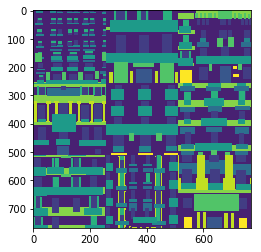

In [62]:
plt.imshow(image.reshape(768,768))

ValueError: not enough image data

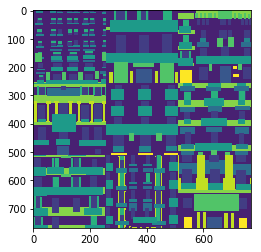

In [83]:
ori_image = image.reshape(768,768)
plt.imshow(ori_image)
Image.fromarray(ori_image.astype(np.uint8),mode='HSV').convert('RGB').save("./test.png")

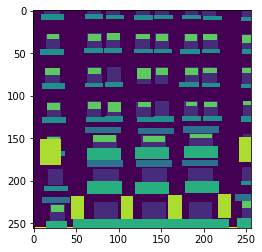

In [102]:
label = train_label[0].reshape(256,256)
plt.imshow(label)

In [110]:
x = np.ones((256,256,3)).astype(np.uint8)*255
x[:,:,0] = 0
x[:,:,0] = np.uint8(15*label)

In [121]:
Image.fromarray(x,mode="HSV").convert('RGB').save("./test.png")

In [95]:
label = np.asarray(label).astype("f")

In [101]:
Image.fromarray(label).save("./test.png")

OSError: cannot write mode F as PNG

In [97]:
label

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]], dtype=float32)

In [49]:
import math
def combine_images(generated_images):
    num = generated_images.shape[0]
    width = int(math.sqrt(num))
    height = int(math.ceil(float(num)/width))
    ch = generated_images.shape[3]
    shape = generated_images.shape[1:3]
    image = np.zeros((height*shape[0], width*shape[1],ch),
                     dtype=generated_images.dtype)
    for index, img in enumerate(generated_images):
        i = int(index/width)
        j = index % width
        image[i*shape[0]:(i+1)*shape[0], j*shape[1]:(j+1)*shape[1],:] = \
            img[:, :, :]
    return image

